# A First Look at Data

## Story and Structure of Dataset

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
planets = sns.load_dataset("planets", cache = False)
planets.head()

In [ ]:
df = planets.copy()
df.head()

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df.method = pd.Categorical(df.method)

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.describe().T

# Missing Values

In [ ]:
planets = sns.load_dataset("planets", cache = False)
df = planets.copy()
df.head()

In [ ]:
df.isnull().values.any()

In [ ]:
df.isnull().sum()

In [ ]:
df["orbital_period"].fillna(df.orbital_period.mean(), inplace=True)
df.isnull().sum()

In [ ]:
numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
df.isnull().sum()

## Categorical variable

In [ ]:
planets = sns.load_dataset("planets", cache = False)
df = planets.copy()
df.head()

In [ ]:
cat_df = df.select_dtypes(include=["object"])

In [ ]:
cat_df.head()

In [ ]:
cat_df.method.unique()

In [ ]:
cat_df["method"].value_counts().count()

In [ ]:
cat_df["method"].value_counts()

In [ ]:
df["method"].value_counts().plot.barh();

## Numeric variables

In [ ]:
planets = sns.load_dataset("planets", cache = False)
df = planets.copy()
df.head()

In [ ]:
num_df = df.select_dtypes(include=["float64", "int64"])

In [ ]:
num_df.head()

In [ ]:
num_df.describe().T

In [ ]:
num_df.distance.describe()

## Scatter Plot

#### barplot

**Veri Seti Hikayesi**

price: dolar cinsinde fiyat ($326–$18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95) 

In [ ]:
diamonds = sns.load_dataset("diamonds", cache=False)
df = diamonds.copy()
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.head()

In [ ]:
df["cut"].value_counts()

In [ ]:
df["color"].value_counts()

In [ ]:
#ordinal definition
from pandas.api.types import CategoricalDtype

In [ ]:
df.cut = df.cut.astype(CategoricalDtype(ordered=True))

In [ ]:
df.dtypes

In [ ]:
df.cut.head(1)

In [ ]:
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [ ]:
df.cut = df.cut.astype(CategoricalDtype(categories=cut_categories, ordered=True))

In [ ]:
df.cut.head(1)

In [ ]:
#barplot

In [ ]:
df.cut.value_counts().plot.barh().set_title("Cut Variable's Frequency");

In [ ]:
(df.cut
 .value_counts()
 .plot.barh()
 .set_title("Cut Variable's Frequency"));

In [ ]:
sns.barplot(x = "cut", y = df.cut.index, data = df);

## Crossover

In [ ]:
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds',cache=False)
df = diamonds.copy()
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories, ordered = True))
df.head()

In [ ]:
sns.catplot(x = "cut", y = "price", palette="muted", data = df);

In [ ]:
sns.barplot(x = "cut", y = "price", hue = "color", palette="muted", data = df);

In [ ]:
df.groupby(["cut","color"])["price"].mean()

## Histogram & Density

In [ ]:
diamonds = sns.load_dataset('diamonds',cache=False)
df = diamonds.copy()
df.head()

In [ ]:
sns.displot(df.price, kde = True);

In [ ]:
sns.displot(df.price, bins = 10);

In [ ]:
sns.displot(df.price, kind = "kde");

In [ ]:
df.price.describe()

In [ ]:
sns.kdeplot(df.price, fill = True)

## Crossover

In [ ]:
(sns
 .FacetGrid(df,
               hue = "cut",
               height = 5,
               xlim = (0,10000))
 .map(sns.kdeplot, "price", fill = True)
 .add_legend()
);

In [ ]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

## Boxplot
total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [ ]:
tips = sns.load_dataset("tips", cache=False)
df = tips.copy()
df.head()

In [ ]:
df.describe().T

In [ ]:
df["sex"].value_counts()

In [ ]:
df["smoker"].value_counts()

In [ ]:
df["day"].value_counts()

In [ ]:
df["time"].value_counts()

In [ ]:
sns.boxplot(x = df.total_bill);

## Crossover

In [ ]:
sns.boxplot(x = "day", y = "total_bill", data = df);

In [ ]:
sns.boxplot(x = "time", y = "total_bill", data = df);

In [ ]:
sns.boxplot(x = "size", y = "total_bill", data = df);

In [ ]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

## Violin

In [ ]:
df.head()

In [ ]:
sns.catplot(y = "total_bill", kind="violin", data = df);

In [ ]:
sns.catplot(x= "day", y = "total_bill", kind="violin", data = df);

In [ ]:
sns.catplot(x= "day", y = "total_bill", hue = "sex", kind="violin", data = df)

# Correlation Plot

## Scatterplot

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [ ]:
tips = sns.load_dataset("tips", cache=False)
df = tips.copy()
df.head()

In [ ]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

## Crossover

In [ ]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

In [ ]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

In [ ]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

In [ ]:
sns.scatterplot(x = "total_bill", y = "tip", size = "size", hue = "size", data = df);

# Linear Association

In [ ]:
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips", cache=False)
df = tips.copy()
df.head()

In [ ]:
sns.lmplot(x = "total_bill", y = "tip", data = df);

In [ ]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

In [ ]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

In [ ]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

## Scatterplot Matrix

In [ ]:
iris = sns.load_dataset("iris", cache=False)
df = iris.copy()
df.head()

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
sns.pairplot(df)

In [ ]:
sns.pairplot(df, hue = "species");

In [ ]:
sns.pairplot(df, hue = "species", markers=["o", "s", "D"]);

In [ ]:
sns.pairplot(df, kind = "reg");

In [ ]:
sns.pairplot(df, hue = "species", kind = "reg");

## Heatmap

In [2]:
flights = sns.load_dataset("flights", cache=False)
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
df.shape

(144, 3)

In [4]:
df.passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [5]:
df = df.pivot(index='month', columns='year', values='passengers');
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


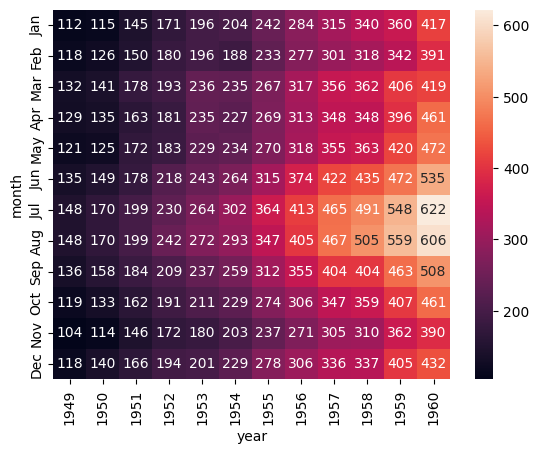

In [10]:
sns.heatmap(df, annot=True, fmt = "d")

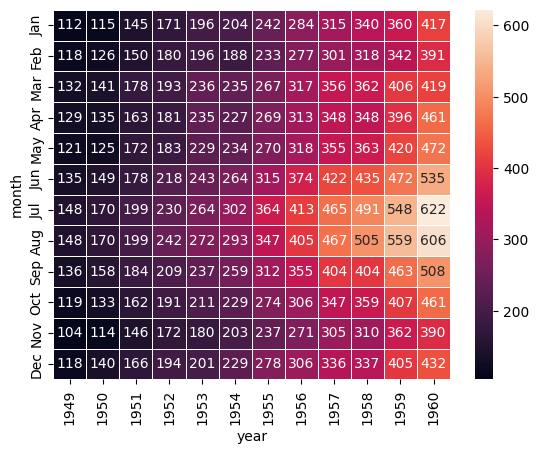

In [11]:
sns.heatmap(df, annot=True, fmt = "d", linewidths=0.5);

## Line Chart

In [12]:
fmri = sns.load_dataset("fmri", cache=False)
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [13]:
df.shape

(1064, 5)

In [16]:
df.timepoint.describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [17]:
df.signal.describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [19]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [21]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [22]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


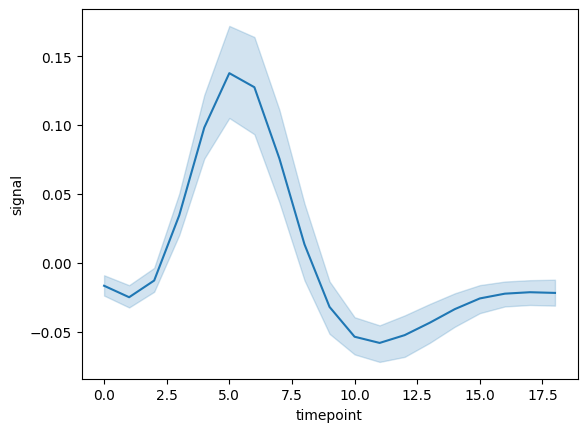

In [27]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

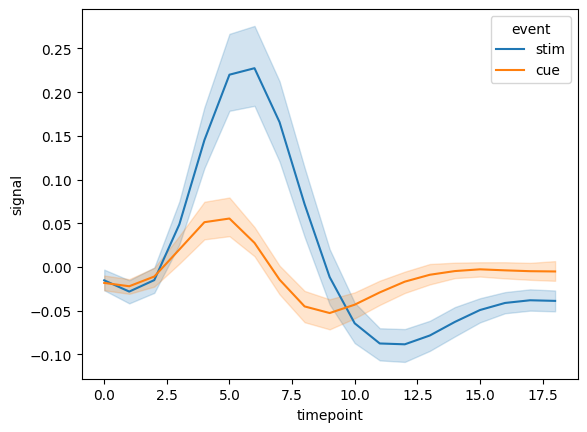

In [28]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

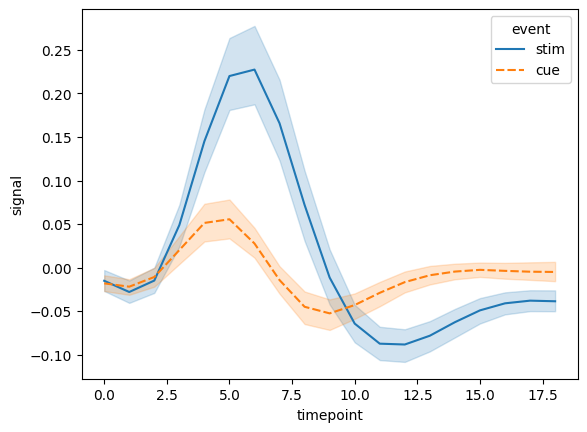

In [29]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

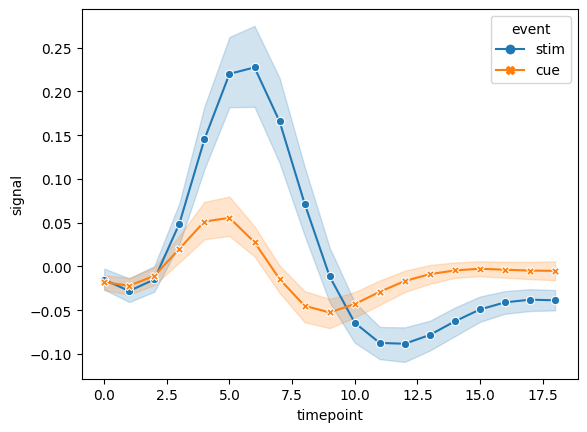

In [30]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event",
             markers = True,
             dashes = False,
             data = df);

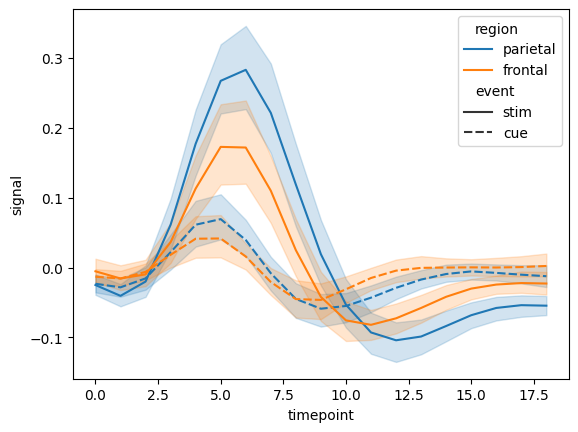

In [32]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event",
             data = df);

##  Time-Series Plot

In [48]:
!pip install pandas_datareader


^C


In [49]:
!pip install yfinance

     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     ---- -------------------------------- 41.0/314.6 kB 393.8 kB/s eta 0:00:01
     ---------- -------------------------- 92.2/314.6 kB 581.0 kB/s eta 0:00:01
     --------------------------- ---------- 225.3/314.6 kB 1.1 MB/s eta 0:00:01
     --------------------------- ---------- 225.3/314.6 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0

In [50]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [52]:
df = pdr.get_data_yahoo('AAPL', start='2016-01-01', end='2019-08-25')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,23.977472,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.376612,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.919147,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.951845,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.067923,283192000


In [53]:
df.shape

(917, 6)

In [54]:
close = df["Close"]
close.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

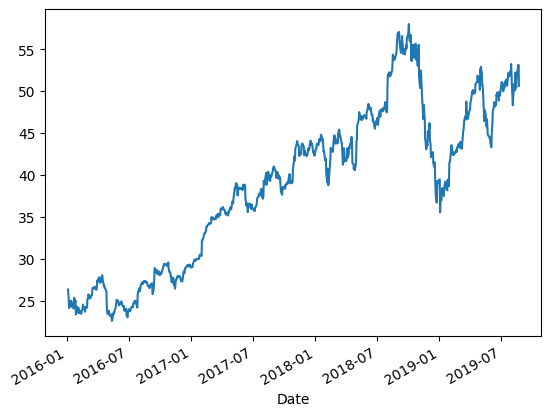

In [56]:
close.plot();

* close.index = pd.DatetimeIndex(close.index)